Loading data...
Original data shape: (39942, 5)

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
None

First 5 rows:
   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conser

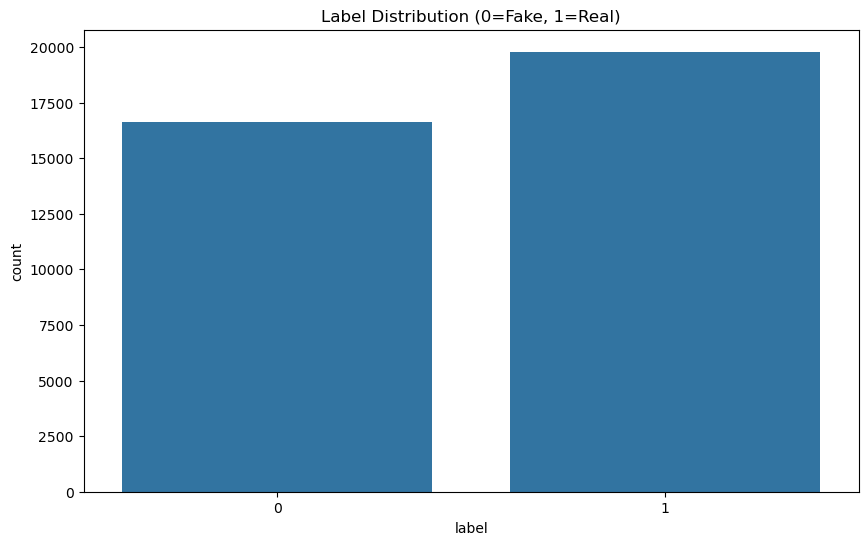


=== SUBJECT ANALYSIS ===
Subjects for REAL news (label=1):
subject
politicsNews    11217
worldnews        8572
Name: count, dtype: int64

Subjects for FAKE news (label=0):
subject
News               9050
politics           6838
Government News     532
left-news           220
Name: count, dtype: int64

Cross-tabulation:
label               0      1
subject                     
Government News   532      0
News             9050      0
left-news         220      0
politics         6838      0
politicsNews        0  11217
worldnews           0   8572

=== DATE ANALYSIS ===
Date range: 2016-01-13 00:00:00 to 2017-12-31 00:00:00
Missing dates: 16640

=== TEXT LENGTH ANALYSIS ===


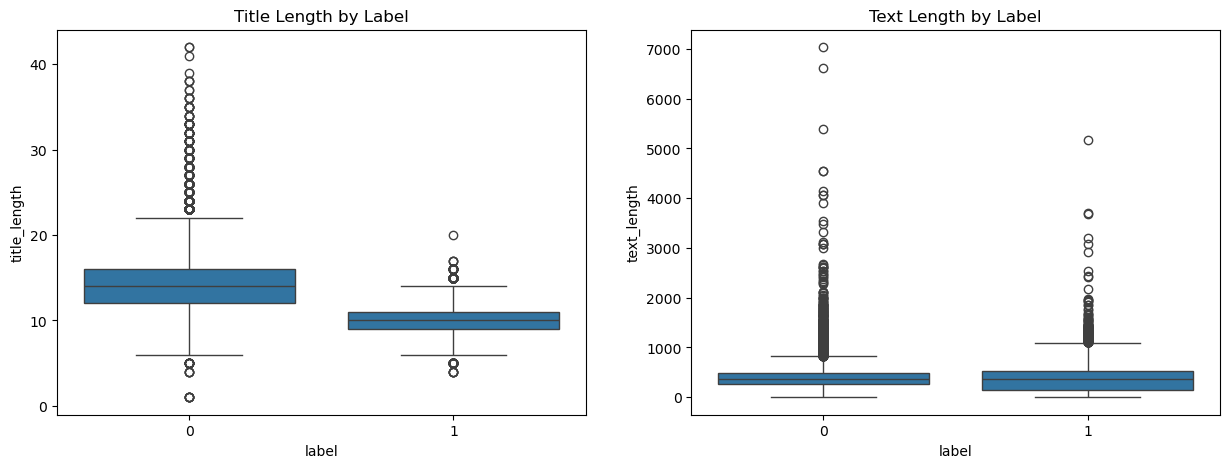


=== WORD CLOUDS ===


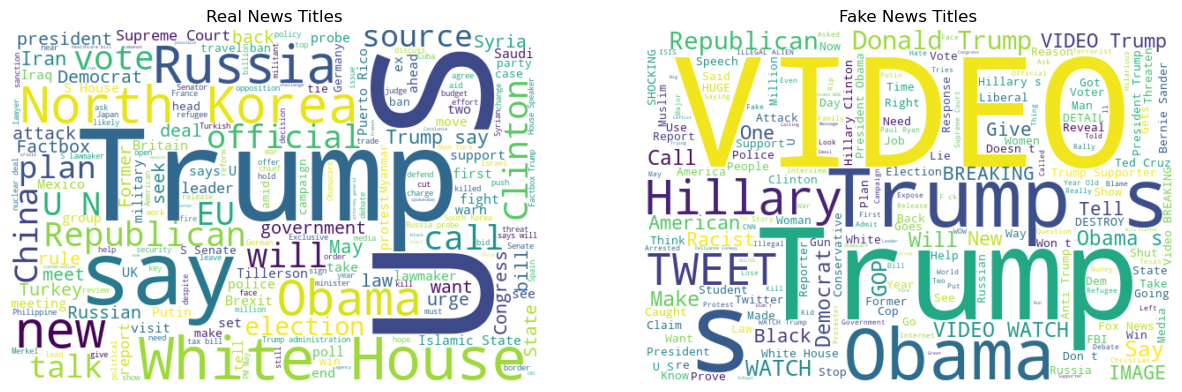


Cleaned data saved to: c:\Users\Amin\Documents\Ironhack_projects\project-nlp-challenge\interim\cleaned_data.csv


In [ ]:
# 01_EDA.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from config import *
from utils import *

# Load data
print("Loading data...")
df = pd.read_csv(RAW_DATA_PATH)
print(f"Original data shape: {df.shape}")

# Basic info
print("\n=== BASIC INFO ===")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for duplicates
print("\n=== DUPLICATES ===")
print(f"Exact duplicates: {df.duplicated().sum()}")
print(f"Title duplicates: {df.duplicated(subset=['title']).sum()}")
print(f"Text duplicates: {df.duplicated(subset=['text']).sum()}")

# Remove duplicates
df_clean = df.drop_duplicates()
df_clean = df_clean.drop_duplicates(subset=['title', 'text'])
print(f"Shape after removing duplicates: {df_clean.shape}")

# Label distribution
print("\n=== LABEL DISTRIBUTION ===")
label_counts = df_clean['label'].value_counts()
print(label_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_clean)
plt.title('Label Distribution (0=Fake, 1=Real)')
plt.show()

# Subject analysis (CRITICAL)
print("\n=== SUBJECT ANALYSIS ===")
print("Subjects for REAL news (label=1):")
print(df_clean[df_clean['label']==1]['subject'].value_counts())
print("\nSubjects for FAKE news (label=0):")
print(df_clean[df_clean['label']==0]['subject'].value_counts())

# Cross-tabulation
subject_label_ct = pd.crosstab(df_clean['subject'], df_clean['label'])
print("\nCross-tabulation:")
print(subject_label_ct)

# Date analysis
print("\n=== DATE ANALYSIS ===")
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
print(f"Date range: {df_clean['date'].min()} to {df_clean['date'].max()}")
print(f"Missing dates: {df_clean['date'].isna().sum()}")

# Text length analysis
print("\n=== TEXT LENGTH ANALYSIS ===")
df_clean['title_length'] = df_clean['title'].apply(lambda x: len(str(x).split()))
df_clean['text_length'] = df_clean['text'].apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='label', y='title_length', data=df_clean, ax=axes[0])
axes[0].set_title('Title Length by Label')
sns.boxplot(x='label', y='text_length', data=df_clean, ax=axes[1])
axes[1].set_title('Text Length by Label')
plt.show()

# Word clouds
print("\n=== WORD CLOUDS ===")
real_text = ' '.join(df_clean[df_clean['label']==1]['title'].astype(str))
fake_text = ' '.join(df_clean[df_clean['label']==0]['title'].astype(str))

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
wordcloud_real = WordCloud(width=600, height=400, background_color='white').generate(real_text)
axes[0].imshow(wordcloud_real, interpolation='bilinear')
axes[0].set_title('Real News Titles')
axes[0].axis('off')

wordcloud_fake = WordCloud(width=600, height=400, background_color='white').generate(fake_text)
axes[1].imshow(wordcloud_fake, interpolation='bilinear')
axes[1].set_title('Fake News Titles')
axes[1].axis('off')
plt.show()

# Save cleaned data
df_clean.to_csv(CLEANED_DATA_PATH, index=False)
print(f"\nCleaned data saved to: {CLEANED_DATA_PATH}")